### Feature Selection
<hr>

### Question 1

#### In this exercise, we will generate simulated data, and will then use this data to perform best subset selection. 
#### a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector ϵ of length n = 100. (Both X and ϵ follow the standard normal distribution. Use set.seed(100) and set.seed(200) in generating X and ϵ, respectively)


In [1]:
set.seed(100)
X <- rnorm(100)

In [2]:
set.seed(200)
e <- rnorm(100)

<h4> b)  Generate a response vector Y of length n = 100 according to the model Y = $\beta_0$ + $\beta_1X$ + $\beta_2X^2$ + $\beta_3X^3$ + ϵ, where $\beta_0$ = 3, $\beta_1$ = 2, $\beta_2$ = 1, $\beta_3$ = 0.5 are constants. </h4>

In [3]:
b0 = 3 
b1 = 2
b2 = 1
b3 = 0.5
Y <- b0 + b1*X + b2*(X^2) + b3*(X^3) + e
dataset = data.frame(X=X, Y=Y)
head(dataset)

X,Y
-0.50219235,2.269243
0.13153117,3.507961
-0.07891709,3.280704
0.88678481,6.466700
0.11697127,3.308180
0.31863009,3.640319


In [4]:
dim(dataset)

[1] 100   2

#### (c) Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors $X$, $X_2$, . . . , $X_{10}$. What is the best model obtained according to Cp, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best models obtained. Note that you will need to use the data.frame() function to create a single data set containing both X and Y.


In [5]:
library(leaps)
reg_full = regsubsets(Y ~ poly(X,10,raw=T), data= dataset, nvmax=10)
reg_full_summary = summary(reg_full)
reg_full_summary

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = T), data = dataset, 
    nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(X, 10, raw = T)1      FALSE      FALSE
poly(X, 10, raw = T)2      FALSE      FALSE
poly(X, 10, raw = T)3      FALSE      FALSE
poly(X, 10, raw = T)4      FALSE      FALSE
poly(X, 10, raw = T)5      FALSE      FALSE
poly(X, 10, raw = T)6      FALSE      FALSE
poly(X, 10, raw = T)7      FALSE      FALSE
poly(X, 10, raw = T)8      FALSE      FALSE
poly(X, 10, raw = T)9      FALSE      FALSE
poly(X, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 poly(X, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  "*"                   " "                   " "                  
3  ( 1 )  "*"                   "*"                   "*"                  
4  ( 1 )  

In [6]:
names(reg_full_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [7]:
which.max(reg_full_summary$adjr2)

[1] 8

In [8]:
which.min(reg_full_summary$cp)

[1] 3

In [9]:
which.min(reg_full_summary$bic)

[1] 3

In [10]:
coef(reg_full, 3)

(Intercept) poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 
            2.9949297             2.2118204             1.0370719 
poly(X, 10, raw = T)3 
            0.4715355

In [11]:
coef(reg_full, 8)

(Intercept)  poly(X, 10, raw = T)1  poly(X, 10, raw = T)2 
            2.84266066             2.04476468             1.73096467 
 poly(X, 10, raw = T)5  poly(X, 10, raw = T)6  poly(X, 10, raw = T)7 
            0.86978777            -0.42169261            -0.32157522 
 poly(X, 10, raw = T)8  poly(X, 10, raw = T)9 poly(X, 10, raw = T)10 
            0.15653175             0.03324358            -0.01547097

#### Answer:
Best model according to Adjusted $R_2$ (includes 8 variables): <br>
Y = 2.8427 + 2.0448$X_1$ + 1.8210$X_2$ + 0.8698$X_5$ - 0.4217$X_6$ - 0.3215$X_7$ + 0.1565$X_8$ + 0.0333$X_9$ - 0.0155$X_{10}$ <br>
<br>
Best model according to $C_p$ and $BIC$ (includes 3 variables): <br>
Y = 2.9949 + 2.2118$X_1$ + 1.0371$X_2$ + 0.4715$X_3$ <br>
<br> 
The evidence is shown by the plots below- <br>
i) Adjusted $R_2$ vs Number of variables - 

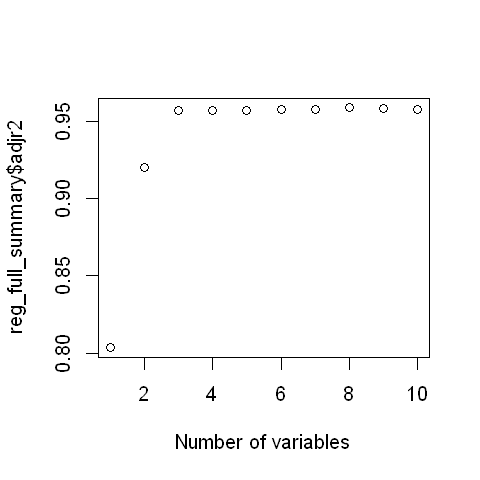

In [12]:
library(repr)
# Change plot size to 4 x 4
options(repr.plot.width=4, repr.plot.height=4)
plot(reg_full_summary$adjr2, xlab ="Number of variables")

ii)  $C_p$ vs Number of variables - 

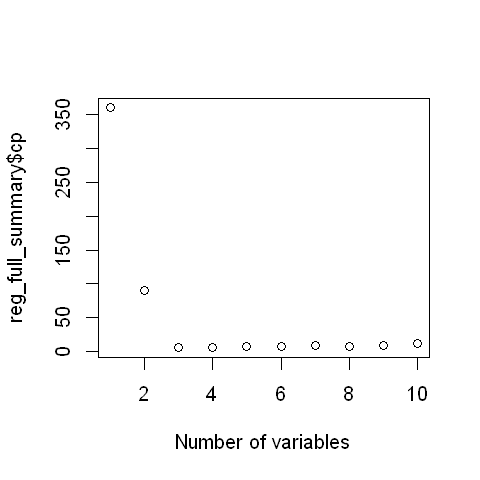

In [13]:
plot(reg_full_summary$cp, xlab ="Number of variables")

c) $BIC$ vs Number of variables - 

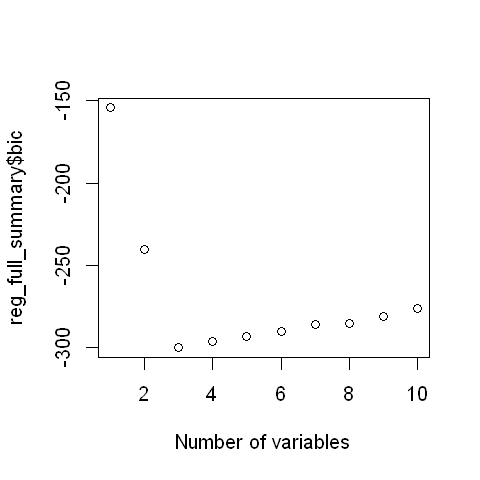

In [14]:
plot(reg_full_summary$bic, xlab ="Number of variables")

#### d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)? 

#### Forward Stepwise Selection

In [15]:
reg_fwd = regsubsets(Y ~ poly(X,10,raw=T), data= dataset, nvmax=10, method="forward")
reg_fwd_summary = summary(reg_fwd)
reg_fwd_summary

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = T), data = dataset, 
    nvmax = 10, method = "forward")
10 Variables  (and intercept)
                       Forced in Forced out
poly(X, 10, raw = T)1      FALSE      FALSE
poly(X, 10, raw = T)2      FALSE      FALSE
poly(X, 10, raw = T)3      FALSE      FALSE
poly(X, 10, raw = T)4      FALSE      FALSE
poly(X, 10, raw = T)5      FALSE      FALSE
poly(X, 10, raw = T)6      FALSE      FALSE
poly(X, 10, raw = T)7      FALSE      FALSE
poly(X, 10, raw = T)8      FALSE      FALSE
poly(X, 10, raw = T)9      FALSE      FALSE
poly(X, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 poly(X, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  " "                   "*"                   "*"                  
3  ( 1 )  "*"                   "*"                   "*"            

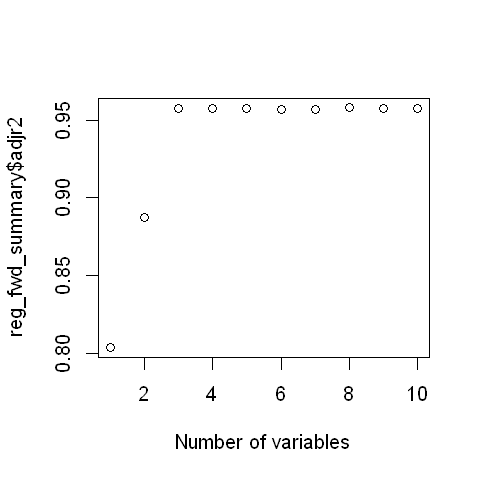

In [16]:
plot(reg_fwd_summary$adjr2, xlab ="Number of variables")

In [17]:
which.max(reg_fwd_summary$adjr2)

[1] 8

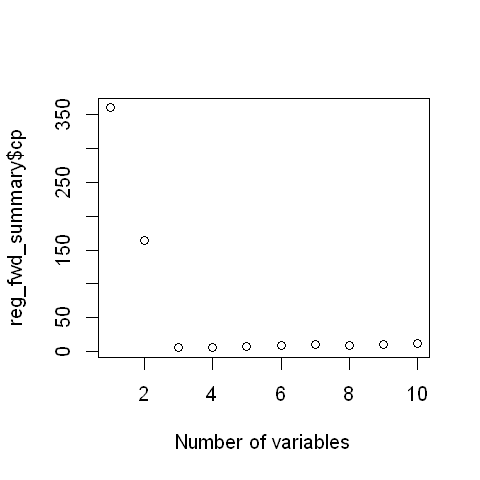

In [18]:
plot(reg_fwd_summary$cp, xlab ="Number of variables")

In [19]:
which.min(reg_fwd_summary$cp)

[1] 3

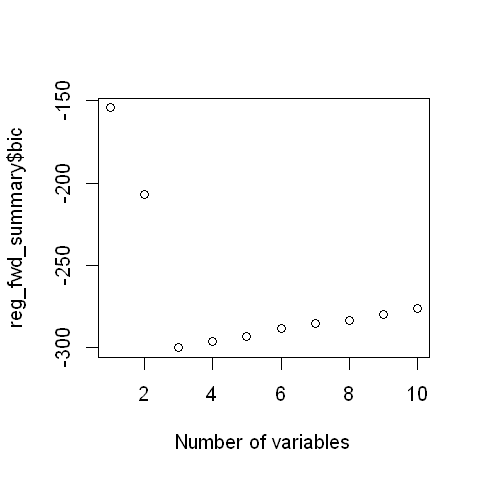

In [20]:
plot(reg_fwd_summary$bic, xlab ="Number of variables")

In [21]:
which.min(reg_fwd_summary$bic)

[1] 3

In [22]:
coef(reg_fwd, 8)

(Intercept)  poly(X, 10, raw = T)1  poly(X, 10, raw = T)2 
           2.816856713            1.538819002            2.141309551 
 poly(X, 10, raw = T)3  poly(X, 10, raw = T)4  poly(X, 10, raw = T)5 
           1.594353000           -0.868708968           -0.416389361 
 poly(X, 10, raw = T)6  poly(X, 10, raw = T)7 poly(X, 10, raw = T)10 
           0.177363158            0.042844358           -0.001816989

In [23]:
coef(reg_fwd, 3)

(Intercept) poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 
            2.9949297             2.2118204             1.0370719 
poly(X, 10, raw = T)3 
            0.4715355

#### Answer: 

For forward stepwise selection, Best model according to Adjusted $R_2$ (includes 8 variables): <br>
Y = 2.8169 + 1.5388$X_1$ + 2.1413$X_2$ - 1.5943$X_3$ - 0.8687$X_4$ - 0.4164$X_5$ + 0.1774$X_6$ + 0.0428$X_7$ - 0.0018$X_{10}$
<br>
vs <br> 
Best model from Best subset selection: <br>
Y = 2.8427 + 2.0448$X_1$ + 1.8210$X_2$ + 0.8698$X_5$ - 0.4217$X_6$ - 0.3215$X_7$ + 0.1565$X_8$ + 0.0333$X_9$ - 0.0155$X_{10}$ <br>
<br>
<br> For forward stepwise selection, Best model according to $C_p$ and $BIC$ (includes 3 variables) is the same as best subset selection: <br>
Y = 2.9949 + 2.2118$X_1$ + 1.0371$X_2$ + 0.4715$X_3$ <br>
<br> 

#### Backward Stepwise Selection

In [24]:
reg_bkd = regsubsets(Y ~ poly(X,10,raw=T), data= dataset, nvmax=10, method="backward")
reg_bkd_summary = summary(reg_bkd)
reg_bkd_summary

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = T), data = dataset, 
    nvmax = 10, method = "backward")
10 Variables  (and intercept)
                       Forced in Forced out
poly(X, 10, raw = T)1      FALSE      FALSE
poly(X, 10, raw = T)2      FALSE      FALSE
poly(X, 10, raw = T)3      FALSE      FALSE
poly(X, 10, raw = T)4      FALSE      FALSE
poly(X, 10, raw = T)5      FALSE      FALSE
poly(X, 10, raw = T)6      FALSE      FALSE
poly(X, 10, raw = T)7      FALSE      FALSE
poly(X, 10, raw = T)8      FALSE      FALSE
poly(X, 10, raw = T)9      FALSE      FALSE
poly(X, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 poly(X, 10, raw = T)3
1  ( 1 )  "*"                   " "                   " "                  
2  ( 1 )  "*"                   "*"                   " "                  
3  ( 1 )  "*"                   "*"                   " "          

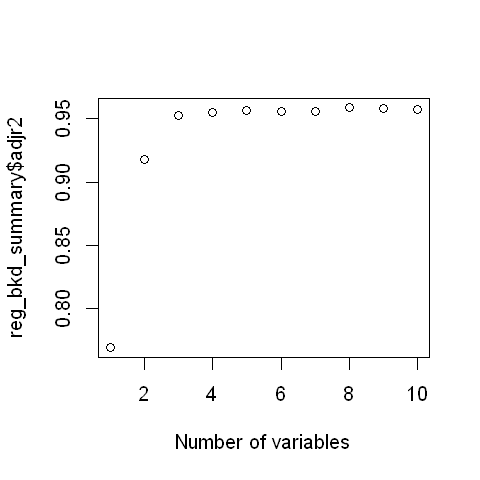

In [25]:
plot(reg_bkd_summary$adjr2, xlab ="Number of variables")

In [26]:
which.max(reg_bkd_summary$adjr2)

[1] 8

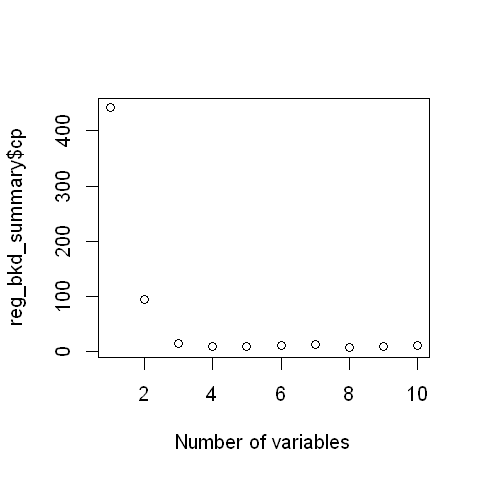

In [27]:
plot(reg_bkd_summary$cp, xlab ="Number of variables")

In [28]:
which.min(reg_bkd_summary$cp)

[1] 8

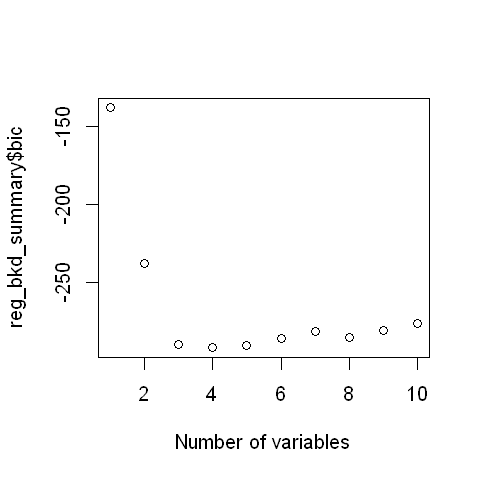

In [29]:
plot(reg_bkd_summary$bic, xlab ="Number of variables")

In [30]:
which.min(reg_bkd_summary$bic)

[1] 4

In [31]:
coef(reg_bkd, 8)

(Intercept)  poly(X, 10, raw = T)1  poly(X, 10, raw = T)2 
            2.84266066             2.04476468             1.73096467 
 poly(X, 10, raw = T)5  poly(X, 10, raw = T)6  poly(X, 10, raw = T)7 
            0.86978777            -0.42169261            -0.32157522 
 poly(X, 10, raw = T)8  poly(X, 10, raw = T)9 poly(X, 10, raw = T)10 
            0.15653175             0.03324358            -0.01547097

In [32]:
coef(reg_bkd, 4)

(Intercept) poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 
           2.98253802            2.51585616            1.06439267 
poly(X, 10, raw = T)5 poly(X, 10, raw = T)7 
           0.17048062           -0.01687728

#### Answer: 

For backward stepwise selection, Best model according to Adjusted $R_2$ (includes 8 variables) is the same as best subset selection: <br>
Y = 2.8427 + 2.0448$X_1$ + 1.8210$X_2$ + 0.8698$X_5$ - 0.4217$X_6$ - 0.3215$X_7$ + 0.1565$X_8$ + 0.0333$X_9$ - 0.0155$X_{10}$ <br>
<br>
<br> For backward stepwise selection, Best model according to $C_p$ (includes 8 variables): <br>
Y = 2.8427 + 2.0448$X_1$ + 1.8210$X_2$ + 0.8698$X_5$ - 0.4217$X_6$ - 0.3215$X_7$ + 0.1565$X_8$ + 0.0333$X_9$ - 0.0155$X_{10}$ <br>
vs <br>
Best model from Best subset selection $C_p$: <br>
Y = 2.9949 + 2.2118$X_1$ + 1.0371$X_2$ + 0.4715$X_3$ <br>
<br>
<br>
<br> For backward stepwise selection, Best model according to $BIC$ (includes 8 variables): <br>
Y = 2.9825 + 2.5159$X_1$ + 1.0644$X_2$ + 0.1705$X_5$ - 0.0169$X_7$ <br>
vs <br>
Best model from Best subset selection $BIC$: <br>
Y = 2.9949 + 2.2118$X_1$ + 1.0371$X_2$ + 0.4715$X_3$ <br>

<hr>

### Question 2

#### In this exercise, we will perform subset selection using data set Boston. Note that the response variable is medv.


In [33]:
library(MASS)
data(Boston)
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


#### a) Perform best subset selection with three predictor. What are the best three predictors?

In [34]:
reg_full = regsubsets(medv~., data=Boston, nvmax=13)
coef(reg_full,3)

(Intercept)          rm     ptratio       lstat 
 18.5671115   4.5154209  -0.9307226  -0.5718057

#### Answer: 
3 best predictors are rm, ptratio, lstat.

#### b) Perform linear regression with the three best predictors. Is your model significant? How much variability can be explained by this linear model.


In [35]:
lm_fit = lm(medv ~ rm + ptratio + lstat, data=Boston)
summary(lm_fit)


Call:
lm(formula = medv ~ rm + ptratio + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4871  -3.1047  -0.7976   1.8129  29.6559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.56711    3.91320   4.745 2.73e-06 ***
rm           4.51542    0.42587  10.603  < 2e-16 ***
ptratio     -0.93072    0.11765  -7.911 1.64e-14 ***
lstat       -0.57181    0.04223 -13.540  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.229 on 502 degrees of freedom
Multiple R-squared:  0.6786,	Adjusted R-squared:  0.6767 
F-statistic: 353.3 on 3 and 502 DF,  p-value: < 2.2e-16


#### Answer: 
The model is pretty significant, because the p-value is very close to zero (< 2.2e-16). <br>
67.86% of the variation can be expressed by the model, by looking at the $R^2$ value. 

#### c) Find the models with seven predictors. Perform forward and backward stepwise subset selection. Are they the same as the best subset selection? If different, does the stepwise subset selection lose much in terms of proportion of variability explained by the model?

In [36]:
reg_fwd = regsubsets(medv~., data=Boston, method="forward", nvmax = 13)
reg_bkd = regsubsets(medv~., data=Boston, method="backward", nvmax = 13)
reg_full_summary = summary(reg_full)
reg_fwd_summary = summary(reg_fwd)
reg_bkd_summary = summary(reg_bkd)

In [37]:
coef(reg_full, 7)

(Intercept)          chas           nox            rm           dis 
 30.411960721   3.051944251 -16.677063917   4.294369137  -1.123472062 
      ptratio         black         lstat 
 -0.973694912   0.008977955  -0.537153086

In [38]:
coef(reg_fwd, 7)

(Intercept)          chas           nox            rm           dis 
 30.411960721   3.051944251 -16.677063917   4.294369137  -1.123472062 
      ptratio         black         lstat 
 -0.973694912   0.008977955  -0.537153086

In [39]:
coef(reg_bkd, 7)

(Intercept)          nox           rm          dis          rad      ptratio 
 34.59015226 -19.13237050   4.18792356  -1.17413873   0.09103789  -1.14412904 
       black        lstat 
  0.01120333  -0.55782222

In [40]:
reg_full_summary$rsq[7]

[1] 0.7221614

In [41]:
reg_bkd_summary$rsq[7]

[1] 0.7187396

In [42]:
reg_fwd_summary$rsq[7]

[1] 0.7221614

#### Answer:

For 7 predictors, <br>
The forward stepwise subset selected model is *almost* equal to the best subset selected model.  <br>
The backward stepwise subset selection differs from the other models. <br> 
The proportion of variability explained by best subset and forward stepwise subset is 72.22 %, compared to 71.87% for backward stepwise subset. Therefore, a minor loss of 0.35% is incurred. 
<br>
<br>
<br>
